# Load Dataset

In [1]:
twitch = pd.read_csv("twitch.csv")
twitch_df = twitch.copy()
twitch_df.tail(2)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,2013-11-20 10:15
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French,2013-12-21 0:22


# Explore Dataset

In [2]:
twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
 11  Date                  992 non-null    object
dtypes: bool(2), int64(7), object(3)
memory usage: 80.2+ KB


In [3]:
twitch['Stream time(minutes)'].max()/60/24

362.1145833333333

In [4]:
twitch['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Finnish         1
Other           1
Swedish         1
Greek           1
Slovak          1
Name: Language, dtype: int64

# Preprocessing 

In [5]:
# Categorical Variables

In [6]:
twitch['English'] = twitch['Language'] == "English"
twitch['English'] = twitch['English'].astype('int')
twitch['Partnered'] = twitch['Partnered'].astype('int')
twitch['Mature'] = twitch['Mature'].astype('int')

In [7]:
# Datetime

In [8]:
twitch['Date'] = pd.to_datetime(twitch['Date'])

In [9]:
from datetime import datetime, timedelta

time = datetime(2020, 9, 1)

twitch['Date'] = time - twitch['Date']

twitch['Date'] = list(date.days for date in twitch['Date'])

In [10]:
# Null

In [11]:
twitch['Date'][twitch['Date'].isna()] = twitch['Date'].median()

# EDA

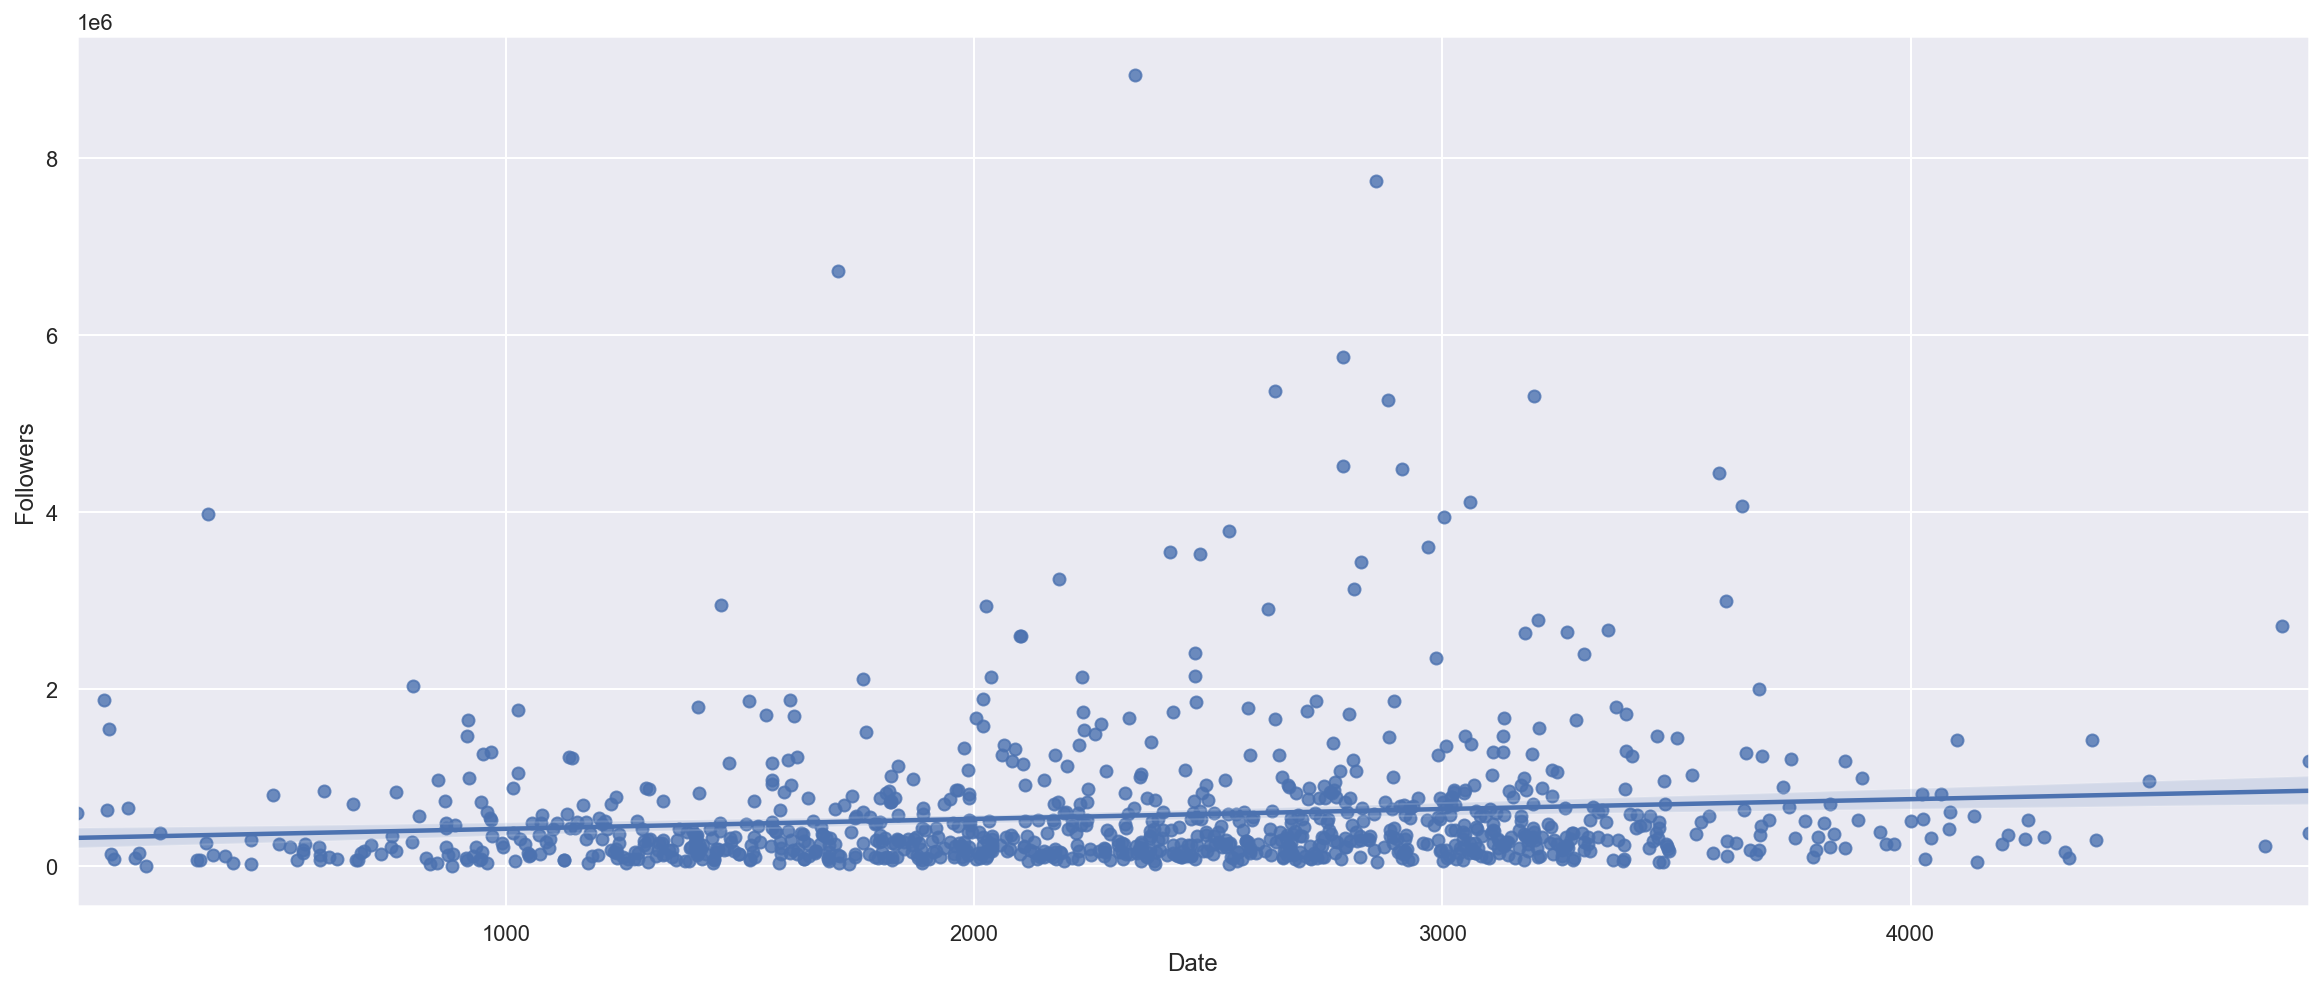

In [12]:
plt.figure(figsize=(20,8))
sns.regplot(x='Date', y='Followers', data=twitch);

In [13]:
corr_matrix = twitch.corr()
corr_matrix

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Date,English
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197,0.037790,0.094492
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978,-0.019371,0.045116
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750,0.019987,0.073642
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648,0.002039,0.038105
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521,0.122110,0.163707
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001,-0.103026,-0.006353
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119,-0.025051,0.033871
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972,0.138880,0.022780
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000,0.072779,0.116251
Date,0.037790,-0.019371,0.019987,0.002039,0.122110,-0.103026,-0.025051,0.138880,0.072779,1.000000,0.213450


In [ ]:
sns.pairplot(twitch)

# Linear Regression

In [14]:
# All Variables

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = twitch.drop(columns=['Channel','Language','Followers gained'])
y = twitch['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

estimators = [('scaler', StandardScaler()),
             ('clf', LinearRegression())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

lin_mae = mean_absolute_error(y_test, y_pred_test)
r2_score = r2_score(y_test, y_pred_test)

print('Train rmse : ', rmse_tr)
print('Test rmse : ', rmse_test)
print('Test mae : ', lin_mae)
print('Test r2 : ', r2_score)

Train rmse :  229207.65080204472
Test rmse :  183302.74023600895
Test mae :  113639.77413584937
Test r2 :  0.4860754096780424


In [16]:
# No Date Variable

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = twitch.drop(columns=['Channel','Language','Followers gained','Date'])
y = twitch['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

estimators = [('scaler', StandardScaler()),
             ('clf', LinearRegression())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

lin_mae = mean_absolute_error(y_test, y_pred_test)
r2_score = r2_score(y_test, y_pred_test)

print('Train rmse : ', rmse_tr)
print('Test rmse : ', rmse_test)
print('Test mae : ', lin_mae)
print('Test r2 : ', r2_score)

Train rmse :  235986.8163262132
Test rmse :  192824.48828508635
Test mae :  118704.49331831408
Test r2 :  0.4312965555835586


In [18]:
# No English Variable

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = twitch.drop(columns=['Channel','Language','Followers gained', 'English'])
y = twitch['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

estimators = [('scaler', StandardScaler()),
             ('clf', LinearRegression())]

pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

lin_mae = mean_absolute_error(y_test, y_pred_test)
r2_score = r2_score(y_test, y_pred_test)

print('Train rmse : ', rmse_tr)
print('Test rmse : ', rmse_test)
print('Test mae : ', lin_mae)
print('Test r2 : ', r2_score)

Train rmse :  230846.59253068315
Test rmse :  185155.25702985376
Test mae :  110955.11668177028
Test r2 :  0.4756351422206013


In [20]:
# DataFrame

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy

columns = [['Channel','Language','Followers gained'], 
           ['Channel','Language','Followers gained','Date'], 
           ['Channel','Language','Followers gained', 'English']]

df = []

for column in columns:
    X = twitch.drop(columns=column)
    y = twitch['Followers gained']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    estimators = [('scaler', StandardScaler()),
                 ('clf', LinearRegression())]

    pipe = Pipeline(estimators)

    pipe.fit(X_train, y_train)

    y_pred_tr = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
    lin_mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    df.append({'Drop Columns' : column[3:], 'Train RMSE' : rmse_tr, 'Test RMSE' : rmse_test, 'Test MAE' : lin_mae, 'Test R2_Score' : r2})

df = pd.DataFrame(df)
df

,Drop Columns,Train RMSE,Test RMSE,Test MAE,Test R2_Score
0,[],229207.650802,183302.740236,113639.774136,0.486075
1,[Date],235986.816326,192824.488285,118704.493318,0.431297
2,[English],230846.592531,185155.257030,110955.116682,0.475635


In [22]:
# Change y-label

In [23]:
columns = [['Channel','Language','Followers'], 
           ['Channel','Language','Followers','Date'], 
           ['Channel','Language','Followers', 'English']]

df = []

for column in columns:
    X = twitch.drop(columns=column)
    y = twitch['Followers']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    estimators = [('scaler', StandardScaler()),
                 ('clf', LinearRegression())]

    pipe = Pipeline(estimators)

    pipe.fit(X_train, y_train)

    y_pred_tr = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
    lin_mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    df.append({'Drop Columns' : column[3:], 'Train RMSE' : rmse_tr, 'Test RMSE' : rmse_test, 'Test MAE' : lin_mae, 'Test R2_Score' : r2})

df = pd.DataFrame(df)
df

,Drop Columns,Train RMSE,Test RMSE,Test MAE,Test R2_Score
0,[],508468.303498,320966.018872,222600.983647,0.761323
1,[Date],521678.181537,329865.203336,224192.009635,0.747904
2,[English],515769.166599,330475.079664,221066.302210,0.746971


# Function

In [110]:
def lin_regr(data, columns, label):

    df = []

    for column in columns:
        X = data.drop(columns = column + [label])
        y = data[label]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
        
        clf_list = [LinearRegression(), ElasticNet(alpha=0.1, l1_ratio=0.5)]
        
        for clf in clf_list:
        
            estimators = [('scaler', StandardScaler()),
                         ('clf', clf)]

            pipe = Pipeline(estimators)

            pipe.fit(X_train, y_train)

            y_pred_tr = pipe.predict(X_train)
            y_pred_test = pipe.predict(X_test)

            rmse_tr = (np.sqrt(mean_squared_error(y_train, y_pred_tr)))
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
            lin_mae = mean_absolute_error(y_test, y_pred_test)
            r2 = r2_score(y_test, y_pred_test)
            mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

            df.append({'Label' : label, 'Drop Columns' : column, 'clf' : clf, 
                       'Train RMSE' : int(round(rmse_tr)), 'Test RMSE' : int(round(rmse_test)), 
                       'MAE' : int(round(lin_mae)), 'MAPE' : int(round(mape)), 'R2_Score' : round(r2, 2)})

    df = pd.DataFrame(df)
    return df

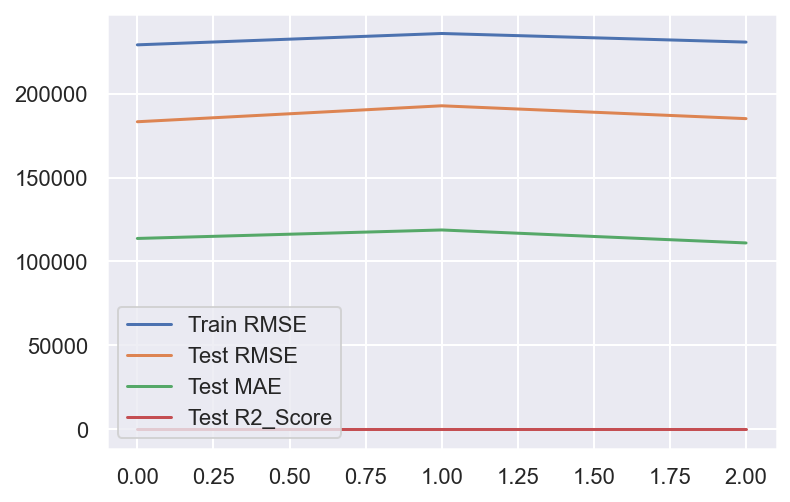

In [100]:
df.plot();

# Drop 24hr Channels

In [101]:
twitch_str_time = twitch.sort_values(by = "Stream time(minutes)", ascending=False)
twitch_str_time.reset_index(inplace=True, drop=True)
twitch_str_time.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Date,English
0,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,1,0,English,4030.0,1
1,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,1,0,English,1230.0,1
2,Monstercat,163589370,519675,14261,313,788684,22331,4084222,1,0,English,3151.0,1
3,RocketBeansTV,360858030,518415,5223,696,416018,27024,5973152,1,0,German,2573.0,0
4,SaltyTeemo,247613265,517980,1803,476,173196,36103,2117741,0,0,English,2498.0,1


In [102]:
index = [x for x in list(range(30)) if x not in [7,11,13,15,17,21,27,28]]
twitch_cln = twitch_str_time.drop(index=index)

# TEST

In [111]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch, columns, 'Followers gained')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers gained,"[Channel, Language]",LinearRegression(),229208,183303,113640,143,0.49
1,Followers gained,"[Channel, Language]",ElasticNet(alpha=0.1),229583,181818,111823,139,0.49
2,Followers gained,"[Channel, Language, Date]",LinearRegression(),235987,192824,118704,148,0.43
3,Followers gained,"[Channel, Language, Date]",ElasticNet(alpha=0.1),236303,190949,116668,145,0.44
4,Followers gained,"[Channel, Language, English]",LinearRegression(),230847,185155,110955,127,0.48
5,Followers gained,"[Channel, Language, English]",ElasticNet(alpha=0.1),231203,183486,109461,122,0.49


In [112]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_cln, columns, 'Followers gained')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers gained,"[Channel, Language]",LinearRegression(),209507,273741,143158,1723,0.42
1,Followers gained,"[Channel, Language]",ElasticNet(alpha=0.1),210011,271140,139973,1619,0.43
2,Followers gained,"[Channel, Language, Date]",LinearRegression(),216661,280218,143618,1806,0.39
3,Followers gained,"[Channel, Language, Date]",ElasticNet(alpha=0.1),217089,277557,141460,1708,0.40
4,Followers gained,"[Channel, Language, English]",LinearRegression(),210954,276672,140493,1769,0.41
5,Followers gained,"[Channel, Language, English]",ElasticNet(alpha=0.1),211436,273830,137867,1665,0.42


In [113]:
# Best score

In [114]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),508468,320966,222601,78,0.76
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),509202,318676,219285,76,0.76
2,Followers,"[Channel, Language, Date]",LinearRegression(),521678,329865,224192,77,0.75
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),522318,328676,223230,78,0.75
4,Followers,"[Channel, Language, English]",LinearRegression(),515769,330475,221066,80,0.75
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),516500,327917,219579,79,0.75


In [115]:
columns = [['Channel','Language',], 
           ['Channel','Language','Date'], 
           ['Channel','Language','English']]

lin_regr(twitch_cln, columns, 'Followers')

,Label,Drop Columns,clf,Train RMSE,Test RMSE,MAE,MAPE,R2_Score
0,Followers,"[Channel, Language]",LinearRegression(),472614,518938,283044,82,0.45
1,Followers,"[Channel, Language]",ElasticNet(alpha=0.1),473512,509903,276923,80,0.47
2,Followers,"[Channel, Language, Date]",LinearRegression(),486398,526089,283566,79,0.43
3,Followers,"[Channel, Language, Date]",ElasticNet(alpha=0.1),487186,518379,279857,79,0.45
4,Followers,"[Channel, Language, English]",LinearRegression(),478763,530091,275566,69,0.43
5,Followers,"[Channel, Language, English]",ElasticNet(alpha=0.1),479665,521015,271740,70,0.45


In [ ]:
# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = twitch_df.drop(columns=['Channel','Language','Followers gained'])
y = twitch_df['Followers gained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

In [ ]:
X = twitch_df.drop(columns=['Channel','Language','Followers gained']).values
# X = twitch_df['Stream time(minutes)'].values.reshape(-1, 1)
y = twitch_df['Followers gained'].values.reshape(-1, 1)

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X

In [ ]:
y

In [ ]:
regr = SVR(kernel="rbf")
regr.fit(X,y)

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr.predict(X)), color = 'blue')
plt.title('SVR')
plt.xlabel('Stream time')
plt.ylabel('Followers gained')
plt.show()